# R&D and Inequality: Some Raw Facts

by [Yingying Lu](https://www.researchgate.net/profile/Yingying_Lu4), [Tina Kao](https://www.cbe.anu.edu.au/about/staff-directory/?profile=Tina-Kao) and [Timothy Kam](https://phantomachine.github.io/)

## Purpose

This notebook studies simple correlation plots on public expenditures on research and development (R&D) and some measures of inequality:

* Gini coefficient

* 90-th to 10-th percentile ratio (P90/P10)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook magic to plot inline
%matplotlib inline

## Data sources

We focus on countries with clear democratic electoral systems in place.

The relevant cross-country data and their sources are:

* Interdecile 90/10 and Gini measures of income inequality: [OECD Data](https://data.oecd.org/inequality/income-inequality.htm)

* Public Expenditure on R&D: [UNESCO UIS.Stat](http://data.uis.unesco.org/#)

## Importing the data

Data has been pre-sorted into an Excel spreadsheet by Yingying. 

The main data sheet is referred to by the option ``sheet_name`` as below:

In [2]:
# Read XLSX data into a dataframe df
df = pd.read_excel('OECD&G20data.xlsx', 
                          sheet_name="data for scatter plot")
df

,Country,Variable,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Australia,GERD - financed by Government %,45.5117,..,41.1782,..,40.2724,..,37.5944,..,...,..,..,..,..,..,..,..,..,..,..
1,Australia,GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.326,NaN,0.337,NaN,0.33,NaN,0.325
2,Australia,Interdecile P90/P10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.4,NaN,4.3,NaN,4.3,NaN,4.3
3,Austria,GERD - financed by Government %,38.0006,38.2719,33.6064,34.4462,32.5849,35.9099,32.2548,32.2981,...,34.9143,38.2539,35.7573,37.7505,33.5747,35.6223,32.5904,30.3509,29.4865,..
4,Austria,GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.284,...,0.289,0.28,0.281,0.276,0.28,0.274,0.275,0.284,0.275,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,United Kingdom,GINI,NaN,NaN,0.359,0.353,0.354,0.359,0.364,0.373,...,0.374,0.351,0.354,0.351,0.358,0.356,0.36,0.351,0.357,NaN
95,United Kingdom,Interdecile P90/P10,NaN,NaN,4.5,4.5,4.4,4.4,4.6,4.6,...,4.5,4.3,4.2,4.2,4.2,4.2,4.2,4.2,4.3,NaN
96,United States,GERD - financed by Government %,26.2384,27.7917,29.8073,30.7478,31.5603,30.7941,29.8592,29.1681,...,32.661,32.6126,31.2672,29.6363,27.5343,25.9441,25.2847,23.5564,22.7761,..
97,United States,GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.396,0.394,0.39,0.391,0.39,NaN


In [3]:
data_array = df.values[:,2::]

In [4]:
data_array.shape

(99, 19)

In [5]:
df.keys()

Index([ 'Country', 'Variable',       2000,       2001,       2002,       2003,
             2004,       2005,       2006,       2007,       2008,       2009,
             2010,       2011,       2012,       2013,       2014,       2015,
             2016,       2017,       2018],
      dtype='object')

### Re-organizing into a 3D dataframe by hierarchical index creation

Let's create an index key ``Country_Names``:

In [6]:
Country_Names = df["Country"].unique()

print("Note: %s has %i countries." % ("Country_Names", Country_Names.size))
print(Country_Names)

Note: Country_Names has 33 countries.
['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Japan' 'Korea' 'Latvia' 'Lithuania'
 'Luxembourg' 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal'
 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'United Kingdom' 'United States']


Let's do the same for an index key ``Variable`` to:

In [7]:
# Variable = df["Variable"].unique()
# print(Variable)

Variable = ["Public Share of GERD", "Gini", "P90/P10"]

Create a list of dates as keys:

In [8]:
Dates = range(2000, 2019)

Now we build a re-organized 3D dataframe:

In [9]:
# Keys and label objects for columns
columns = pd.MultiIndex.from_product([Country_Names, Variable],
                                   names=['Country', 'Variable'])

# Overwrite previous df by this 3D version (transpose data)
df = pd.DataFrame(data_array.transpose(), index=Dates, columns=columns)

In [10]:
# df

In [11]:
# df.keys()

## Public R&D spending and Inequality of Income

Given the limited observations, we decided to pool the relevant countries across available years.

The scatterplots below are based on these pooled data.

In [12]:
# for idx_c, country in enumerate(Country_Names):
#     print(idx_c, country)
#     print(df[country]["Gini"], df[country]["Public Share of GERD"]) 

## Pooled across several years - Cleaned data (unsorted by country, missing data)

In [13]:
df2 = pd.read_excel('OECD&G20data.xlsx', 
                          sheet_name="Sheet1")

In [14]:
# df2

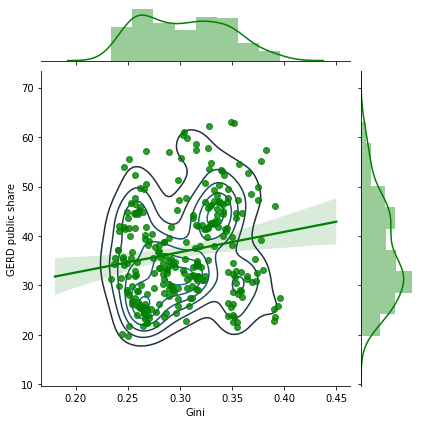

In [20]:
g = (sns.jointplot("Gini", "GERD public share", 
                  data=df2, 
                  kind="reg",
                  color ="green")).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
g.savefig("figures/gini-pgerd-pooled.png")

## Most current observation for each country

In [21]:
df3 = pd.read_excel('OECD&G20data.xlsx', 
                          sheet_name="OECD")

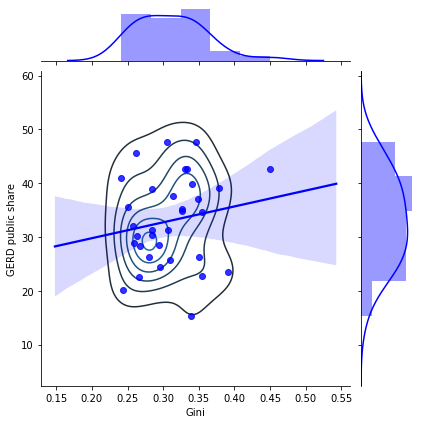

In [22]:
g = (sns.jointplot("Gini", "GERD public share", 
                  data=df3, 
                  kind="reg",
                  color ="blue")).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
g.savefig("figures/gini-pgerd-latest.png")

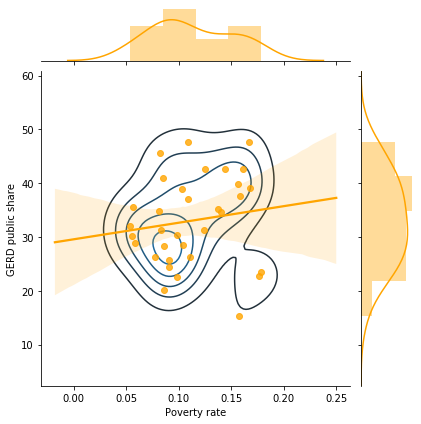

In [23]:
g = (sns.jointplot("Poverty rate", "GERD public share", 
                  data=df3, 
                  kind="reg",
                  color ="orange")).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
g.savefig("figures/poverty-pgerd-latest.png")

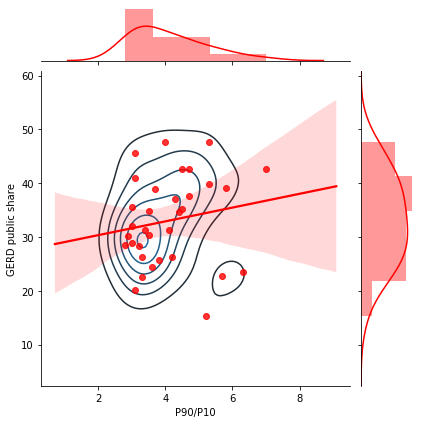

In [24]:
g = (sns.jointplot("P90/P10", "GERD public share", 
                  data=df3, 
                  kind="reg",
                  color ="red")).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
g.savefig("figures/p90p10-pgerd-latest.png")